## Author: Sridharan Chandran

# FEATURISATION & MODEL TUNING

**• DOMAIN:** Semiconductor manufacturing process.

**• CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

**• DATA DESCRIPTION:** sensor-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features.

The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

**• PROJECT OBJECTIVE**: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

### 1. Import and understand the data. 

In [1]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### A. Import ‘signal-data.csv’ as DataFrame. 

In [2]:
df = pd.read_csv("signal-data.csv")

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df.shape

(1567, 592)

#### B. Print 5 point summary and share at least 2 observations.

In [5]:
pd.set_option('display.max_columns', None) # To view the max columns
df.describe() # 5 point summery

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,1561.000000,1561.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.000000,549.000000,549.000000,549.000000,852.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.000000,1558.00000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1559.000000,1559.000000,1559.000000,1562.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0

   * In feature - '3', '22', ('25 to 27'), min value is 0.00 which is seems a null value.
   * In feature - "4" max value is 1114.536 which is seems an outlier. Because all other quartile percentage values are sigle digit values.
   * In features - ['5','42','49','69'] the standard deviation value is 0.0 which means all the values are same in the features
    
   * All the values are 0.0 (Null value) in the following features ['13','52','97','141','149','178','179','186',('189 to 194'),'226',('229 to 237'), ('240 to 243'), ('256 to 266'), '276','284',(313 to 315), 322, (325 to 330),364, (369 to 375), (378 to 381), (394 to 404),414,422, (449 to 452), 458,(461 to 466),481,498, (501 to 509), (512 to 515),(528 to 538)]

### 2. Data cleansing:

#### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [6]:
df1 = df.copy(deep=True) # Deep copy of the original dataframe.

In [7]:
df1.shape

(1567, 592)

In [8]:
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    df = df
    return df

In [9]:
df2 = missing_values(df1,20)

In [10]:
df2.shape

(1567, 560)

In [11]:
df2 = df2.fillna(df2.mean())

In [12]:
pd.set_option('display.max_rows', None) # To view the max rows
df2.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
42           0
43           0
44           0
45           0
46           0
47           0
48           0
49           0
50           0
51           0
52           0
53           0
54           0
55           0
56           0
57           0
58           0
59           0
60           0
61           0
62           0
63           0
64           0
65        

#### B. Identify and drop the features which are having same value for all the rows.

In [13]:
# Drop all features same value for all the rows
nunique = df2.nunique()
cols_to_drop = nunique[nunique == 1].index
df3=df2.drop(cols_to_drop, axis=1)
df3.shape

(1567, 444)

#### C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [14]:
# In this dataframe time feature is not useful for our data analysis. Hence we can drop the "Time" feature.

df3.drop("Time",axis=1,inplace =True)

In [15]:
df3.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,624.3145,218.3174,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,608.1700,84.0793,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,20.95,0.333,12.49,16.713,0.0803,5.72,11.19,65.363,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0744,0.0546,0.0027,0.0040,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,2.5883,0.0010,0.0319,0.0197,0.0120,0.0109,3.9321,1.5123,3.5811,0.1337,0.0055,3.8447,0.1077,0.0167,418.1363,398.3185,496.1582,158.3330,0.0373,0.0202,0.0462,0.6083,0.3032,0.0200,0.0174,0.2827,0.0434,0.1342,0.2419,0.1343,0.3670,0.1431,0.0610,6.2698,0.1181,3.8208,5.3737,0.0254,1.6252,3.2461,18.0118,0.0752,1.5989,6.5893,0.0913,3.0911,8.4654,1.5989,1.2293,5.3406,0.0867,2.8551,0.0,2.9971,31.8843,0.0,0.0215,0.0274,0.0315,0.0238,0.0206,0.0238,0.0144,0.0491,1.2708,0.0004,0.0229,0.0065,55.2039,0.0105,560.2658,0.0170,0.0148,0.0124,0.0114,0.0010,0.0013,0.0055,0.0,61.5932,0.0003,0.9967,0.0082,0.0017,0.1437,0.0151,14.2396,1.4392,5.6188,3.6721,2.9329,2.1118,24.8504,29.0271,6.9458,2.7380,5.9846,525.0965,0.0000,3.4641,6.0544,53.6840,2.4788,4.7141,1.7275,

#### D. Check for multi-collinearity in the data and take necessary action.

In [16]:
# To suppress scientific notations
pd.set_option('display.float_format', '{:.2f}'.format)

#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df3.columns
vif["vif_Factor"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,features,vif_Factor
0,0,24224.26
1,1,9573.51
2,2,154511.61
3,3,127.67
4,4,42515.86
5,6,2228.45
6,7,377.72
7,8,3058.22
8,9,1.74
9,10,1.63


**A VIF less than 5 indicates a low correlation of that predictor with other predictors. A value between 5 and 10 indicates a moderate correlation, while VIF values larger than 10 are a sign for high, not tolerable correlation of model predictors**

In [17]:
# Drop all columns VIF value greater than 10

vif1 = vif[vif["vif_Factor"]>10]
col_drop = list(vif1["features"])

df4 = df3.drop(col_drop,axis=1)
df4.head()

,9,10,24,41,59,75,76,77,78,79,80,81,82,91,95,101,102,107,108,129,418,419,432,433,468,482,483,484,485,486,487,488,489,499,500,511,521,586,589,Pass/Fail
0,0.02,-0.00,751.00,4.51,-1.73,0.01,-0.02,0.01,-0.03,-0.01,-0.00,-0.06,-0.00,-0.33,0.00,0.00,0.14,-0.25,0.32,-0.05,525.10,0.00,26.36,49.00,311.64,613.31,291.48,494.70,178.18,843.11,0.00,53.11,0.00,0.00,0.00,0.00,0.00,0.02,99.67,-1
1,-0.00,-0.01,-1640.25,2.77,0.81,-0.00,-0.02,0.00,-0.04,-0.04,-0.01,-0.04,0.00,0.15,0.00,-0.00,-0.08,0.08,-0.09,-0.09,0.00,368.97,8.49,199.79,463.29,0.00,246.78,0.00,359.04,130.63,820.79,194.44,0.00,0.00,0.00,0.00,0.00,0.01,208.20,-1
2,0.00,0.00,-1916.50,5.43,23.82,-0.01,-0.03,-0.01,0.02,-0.01,-0.11,-0.02,0.03,0.06,0.00,-0.00,0.01,-0.03,-0.07,-0.19,0.00,0.00,18.75,109.57,21.36,434.27,151.77,0.00,190.39,746.91,74.07,191.76,250.17,0.00,0.00,244.27,0.00,0.06,82.86,1
3,-0.01,-0.00,-1657.25,1.28,24.38,-0.06,-0.05,-0.04,0.04,0.07,-0.11,0.00,0.03,0.07,0.00,0.00,-0.07,-0.05,-0.12,0.28,317.74,0.00,76.04,181.26,24.28,225.02,100.49,305.75,88.56,104.67,71.76,0.00,336.77,0.00,711.64,0.00,0.00,0.02,73.84,-1
4,-0.00,-0.01,117.00,2.21,-12.29,-0.05,0.02,-0.02,-0.04,0.00,-0.02,-0.01,-0.00,0.04,-0.00,-0.00,0.07,-0.08,-0.20,-0.57,0.00,866.03,43.81,0.00,44.90,171.45,276.88,461.86,240.18,0.00,587.38,748.18,0.00,293.14,0.00,0.00,0.00,0.02,73.84,-1


In [18]:
df4.duplicated().sum() # Check the duplicated rows.

0

In [19]:
df4.shape

(1567, 40)

#### E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

* We have done the initial step of data cleansing is calculate the percentage of the null values the we have droped the features which are having more than 20% null values because more missing values causes increase the probability of errors on model prediction.

* The second step is drop the features which are having same value at all the rows. Because features are "0" standard deviation & no impact on the target feature.

* The third step is drop the time feature which is not useful to our analysis.

* The final step is drop all the columns which are highly correlated which VIF value is greater than 10.

In [20]:
df4.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82,91,95,101,102,107,108,129,418,419,432,433,468,482,483,484,485,486,487,488,489,499,500,511,521,586,589,Pass/Fail
count,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00
mean,-0.00,0.00,-298.60,3.35,2.96,-0.01,-0.03,-0.01,-0.01,0.00,-0.02,-0.02,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.55,320.26,309.06,99.37,205.52,224.17,318.42,206.56,215.29,201.11,302.51,239.46,352.62,272.17,263.20,240.98,275.98,11.61,0.02,99.67,-0.87
std,0.02,0.01,2900.84,2.34,9.51,0.02,0.03,0.03,0.05,0.02,0.05,0.02,0.04,0.09,0.00,0.00,0.06,0.09,0.09,1.22,287.52,325.24,126.11,225.63,230.25,278.85,191.38,211.49,217.01,285.15,261.81,250.10,226.29,324.56,322.80,329.45,103.12,0.01,93.86,0.50
min,-0.05,-0.03,-14804.50,-0.08,-28.99,-0.10,-0.19,-0.10,-0.35,-0.06,-0.14,-0.10,-0.21,-0.36,-0.00,-0.00,-0.54,-0.52,-0.35,-3.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,-1.00
25%,-0.01,-0.01,-1474.38,2.70,-1.86,-0.02,-0.05,-0.03,-0.05,-0.01,-0.04,-0.03,-0.02,-0.04,0.00,-0.00,-0.04,-0.05,-0.06,-0.90,0.00,0.00,31.03,10.05,38.88,0.00,82.41,77.01,51.19,0.00,57.32,145.16,113.81,0.00,0.00,0.00,0.00,0.01,44.37,-1.00
50%,-0.00,0.00,-80.50,3.08,0.97,-0.01,-0.03,-0.01,-0.01,0.00,-0.01,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,-0.01,-0.14,302.31,272.89,58.29,151.17,151.15,298.43,150.88,142.53,115.89,260.14,114.60,352.51,221.51,0.00,0.00,0.00,0.00,0.02,72.02,-1.00
75%,0.01,0.01,1376.25,3.52,4.34,0.01,-0.01,0.01,0.01,0.01,0.01,-0.01,0.03,0.05,0.00,0.00,0.03,0.05,0.04,0.05,523.62,582.80,120.14,304.54,334.67,512.39,260.08,288.92,283.29,497.38,391.28,507.50,372.34,536.12,505.23,554.01,0.00,0.03,114.75,-1.00
max,0.07,0.05,14106.00,37.88,168.15,0.23,0.07,0.13,0.25,0.10,0.12,0.06,0.14,0.36,0.00,0.00,0.30,0.49,0.39,2.46,999.32,998.68,994.29,995.74,999.88,999.41,989.47,996.86,994.00,999.49,995.74,997.52,994.00,1000.00,999.23,1000.00,1000.00,0.10,737.30,1.00


* We assume that the dataset has some outliers because most of the feature's min & max values are greater the 2 standard deviation from the mean value of respective feature.

### 3. Data analysis & visualisation:

#### A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

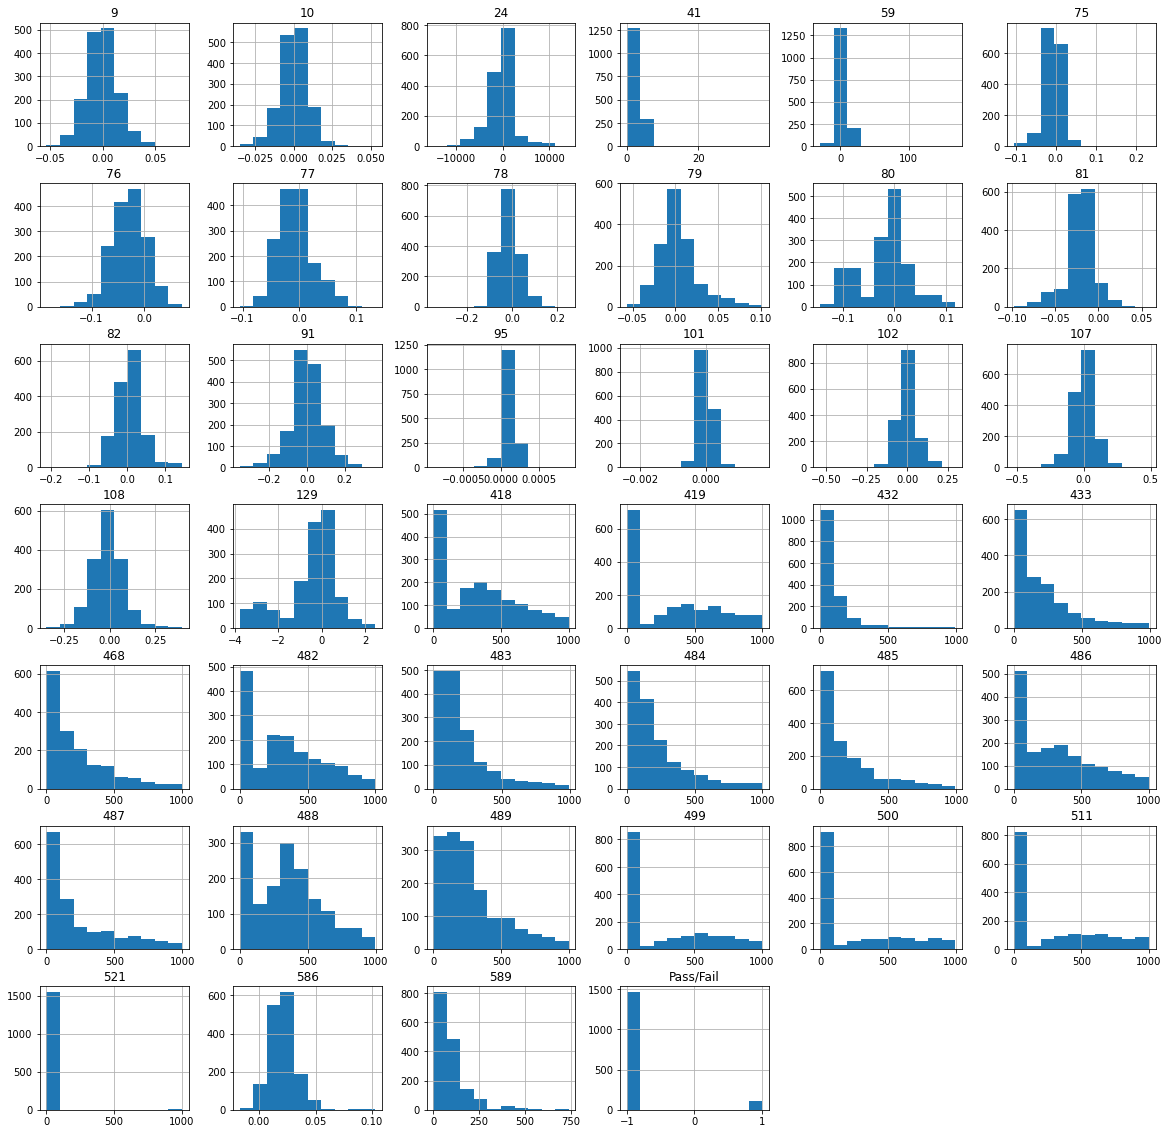

In [21]:
# creating histograms
df4.hist(figsize=(20, 20))
plt.show()

* Features 9,10,24,41,59,75to78, 81to108,586 are Normal distribution

* Features 79,433,468,483,484,485,487,589 are Right skewed distribution

* Features 80,129,418,419,482,489,500,511 are Multimodal distribution

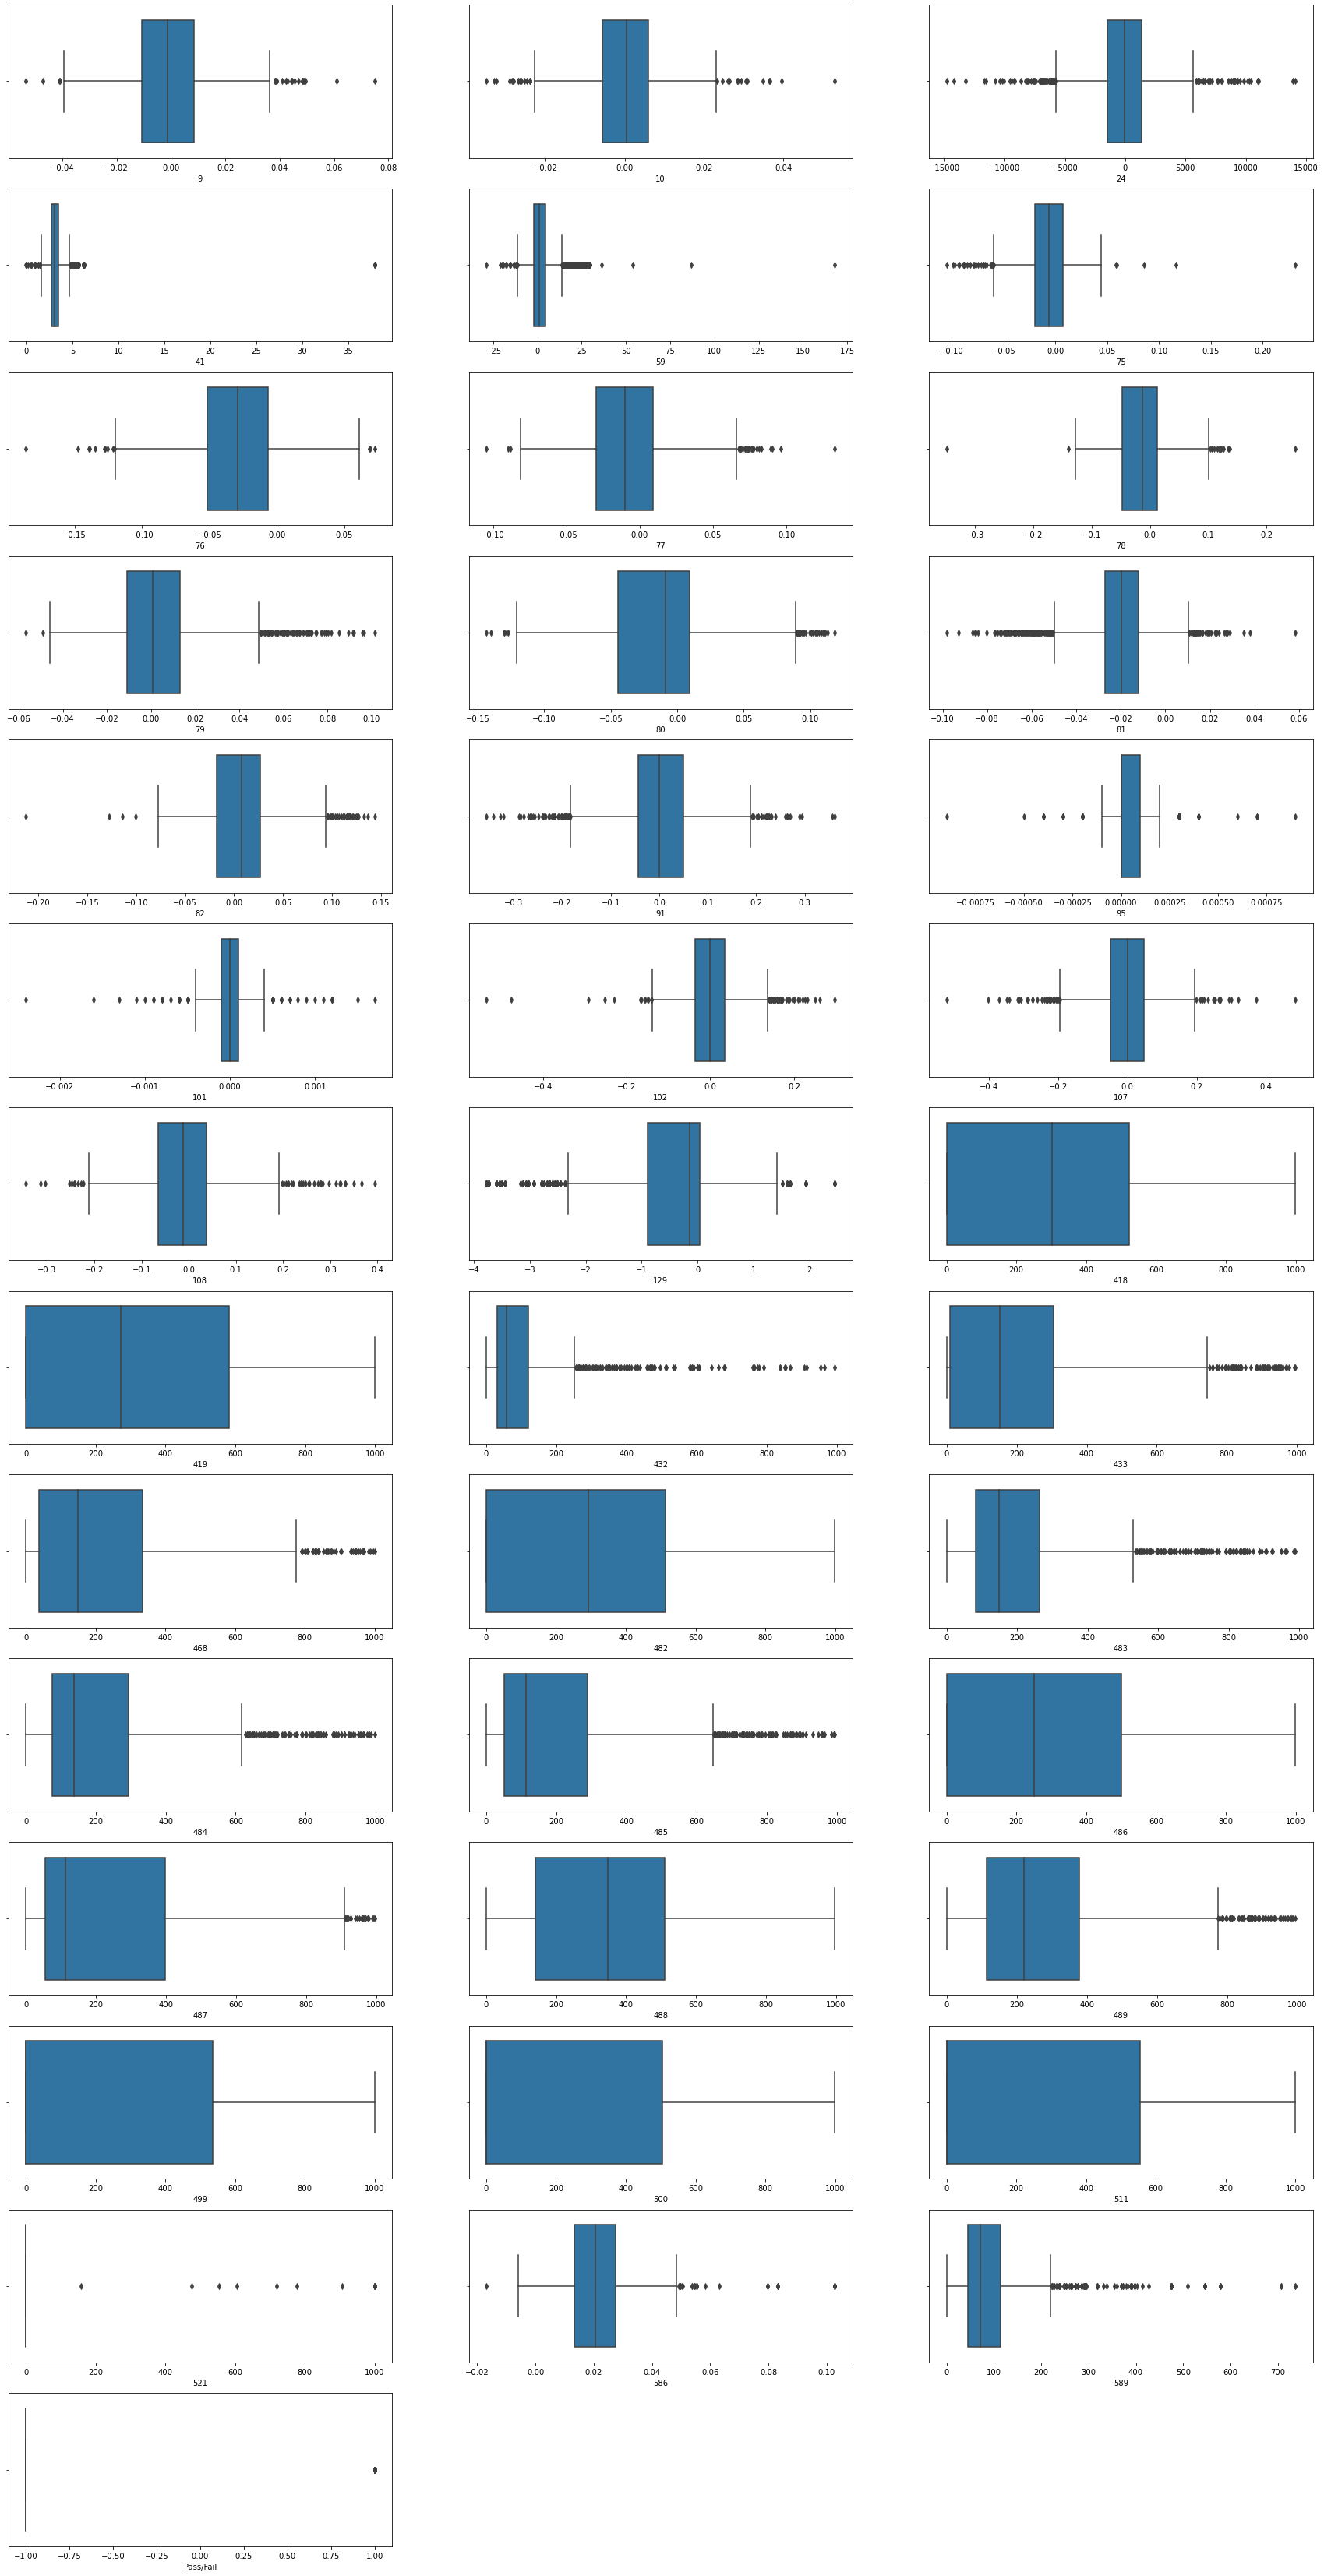

In [22]:
# Visualize the boxplot
plt.figure(figsize=(30,60))
pos=1
for i in df4.columns:
    plt.subplot(14,3,pos)
    sns.boxplot(df[i])
    pos +=1

#### B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

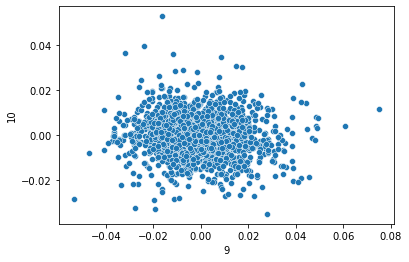

In [23]:
sns.scatterplot(data=df4,x="9",y="10");

With above plot we can see that features "9" & "10" are not correlated with each other.
* Feature "9" has distributed from -0.06 to 0.08.
* Feature "10" has distributed from -0.04 to 0.06.

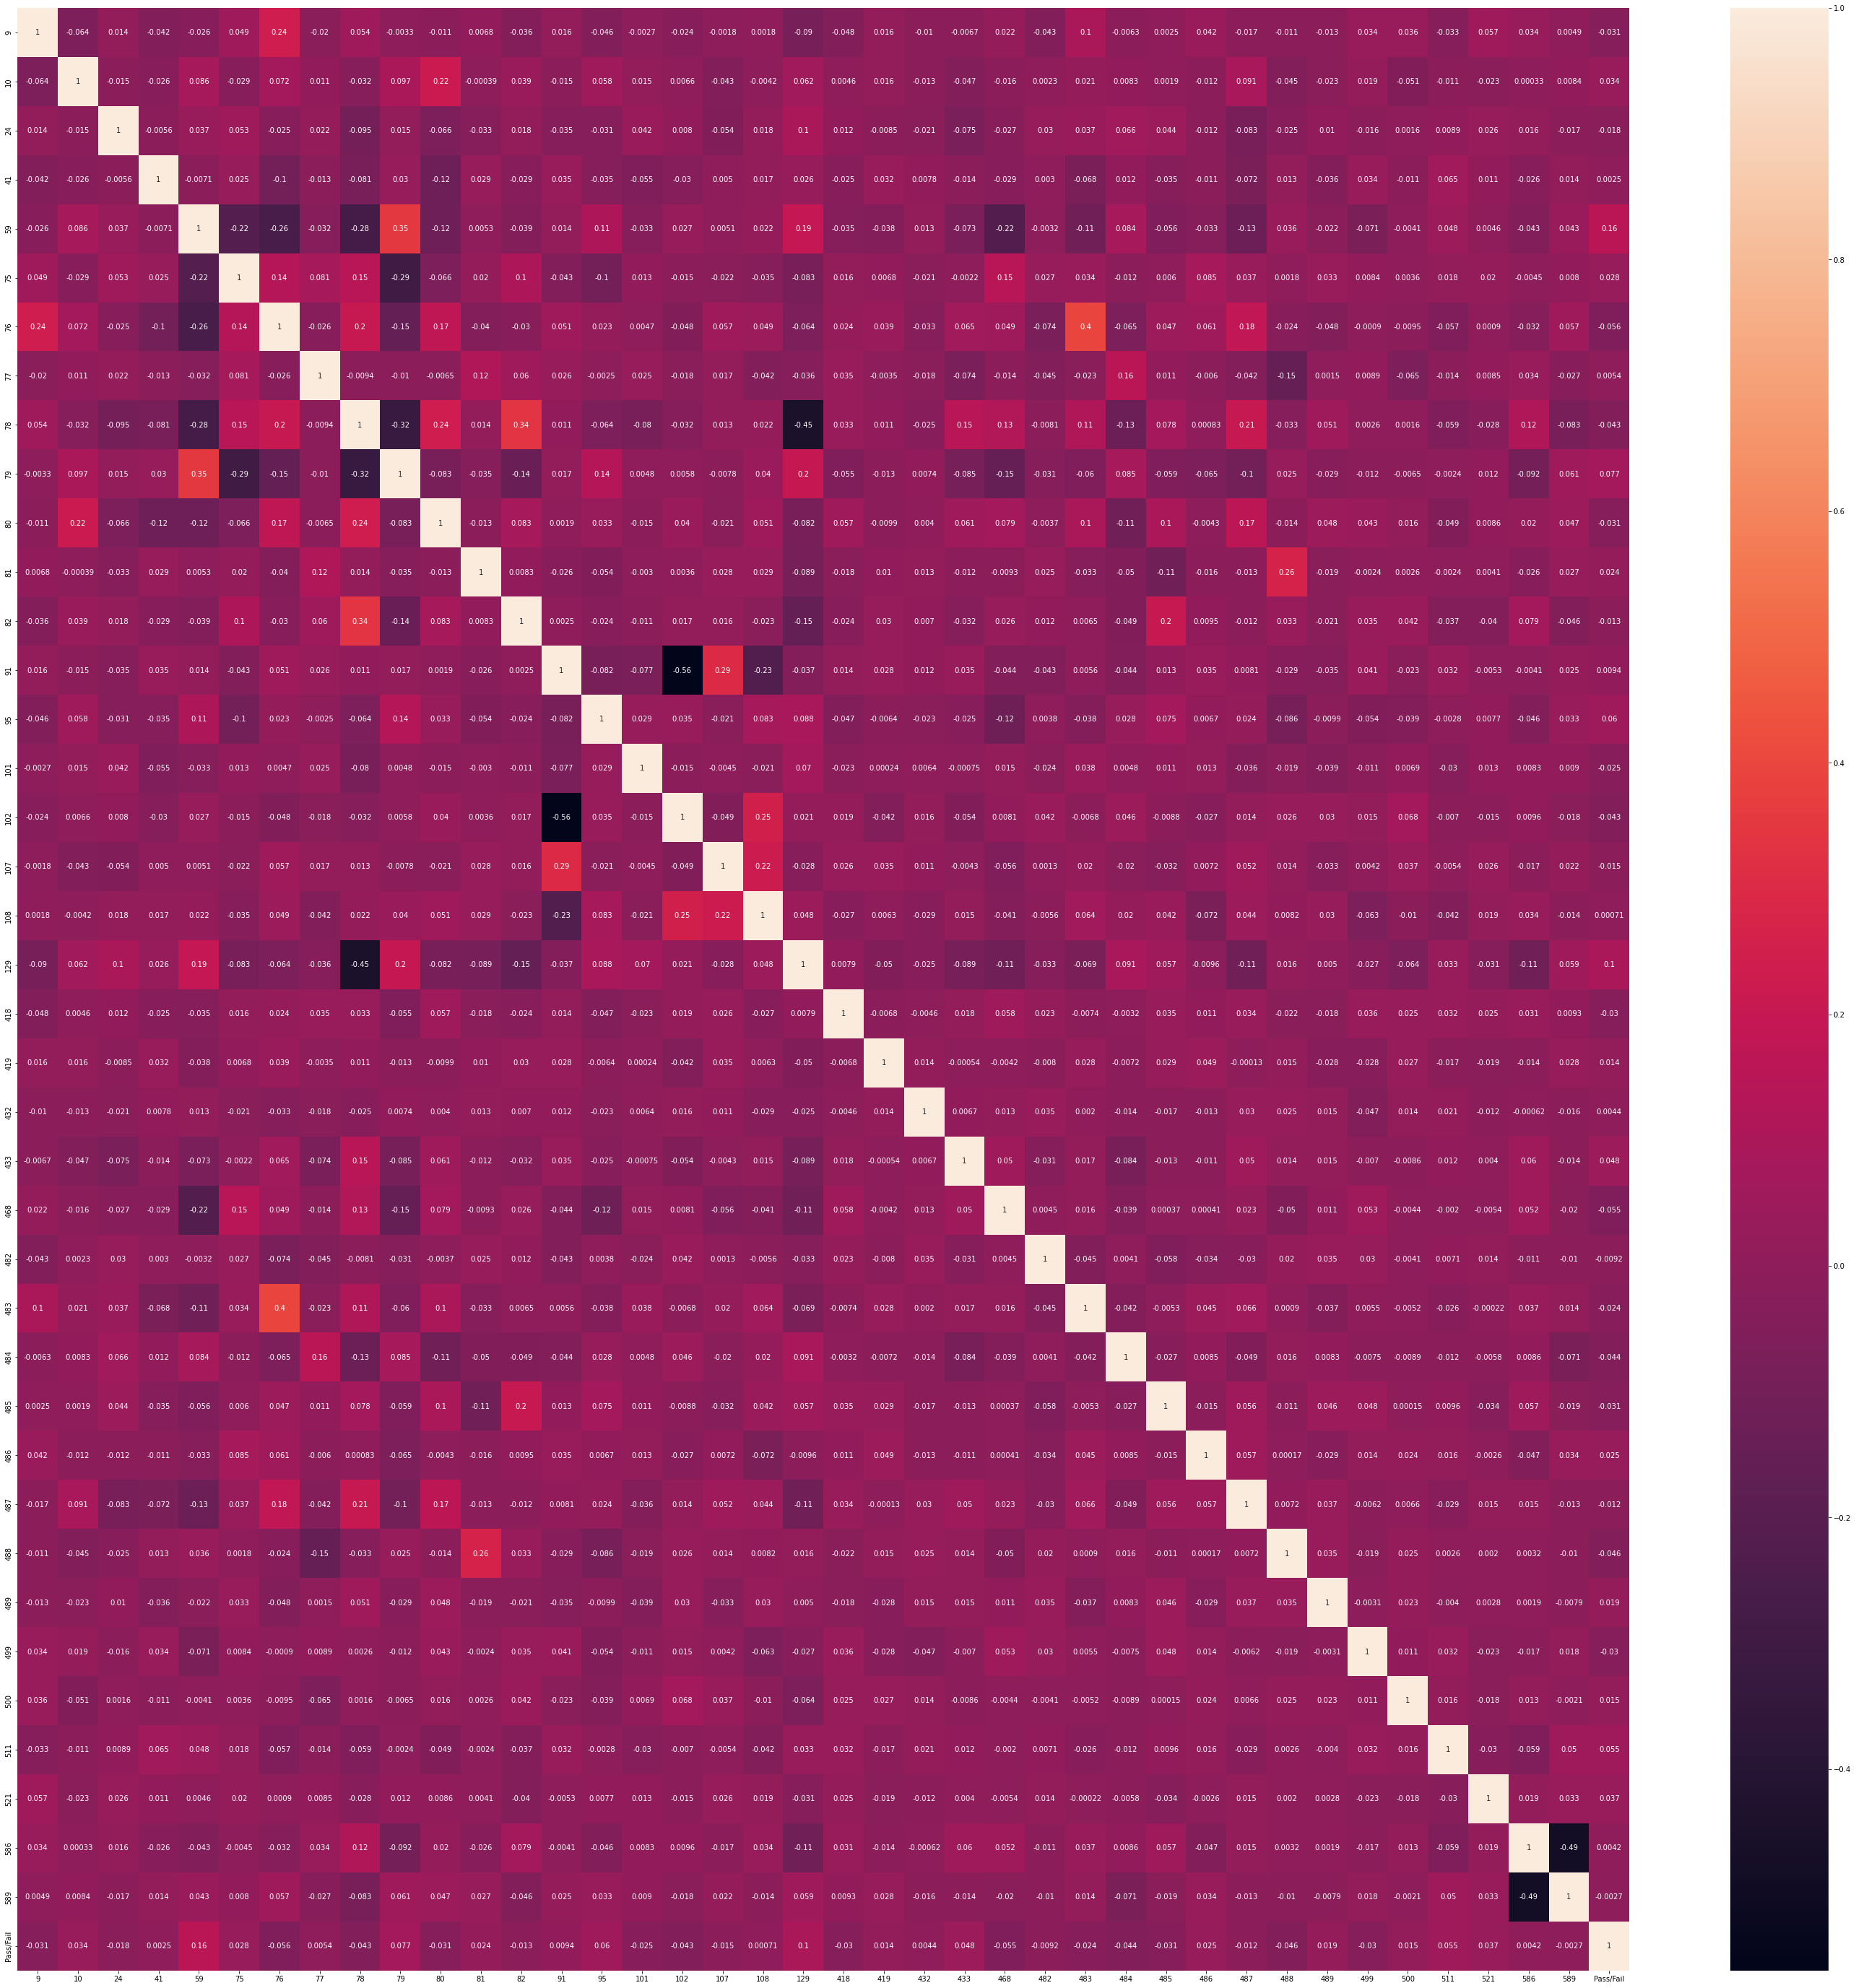

In [24]:
plt.figure(figsize=(50,50))
sns.heatmap(df4.corr(),annot=True);

 * Features "76" & "483" are 40% correleated positively.
 * Features "78" & "129" are 45% correlated negatively
 * Features "91" & "102" are 56% correlated negatively
 * Features "586" & "589" are 49% correlated negatively

### 4. Data pre-processing:

#### A. Segregate predictors vs target attributes. 

In [25]:
# Split the data

x = df4.iloc[:,:-1] # All the features except target feature
y = df4.iloc[:,-1] # Target feature

#### B. Check for target balancing and fix it if found imbalanced.

In [26]:
y.value_counts(normalize=True) # Target features unique values percentage.

-1   0.93
 1   0.07
Name: Pass/Fail, dtype: float64

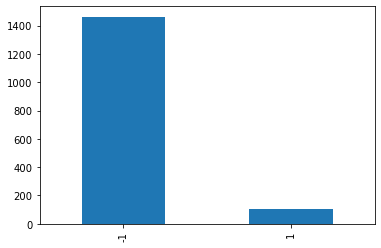

In [27]:
y.value_counts().plot(kind="bar"); # Target features class unique value counts

*Install the imbalanced learn package.*

In [28]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn.over_sampling import SMOTE # oversample the minority class with SMOTE.

# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [30]:
print(X.shape,Y.shape)

(2926, 39) (2926,)


#### C. Perform train-test split and standardise the data or vice versa if required.

*We need to split the data first & then standardise the data to avoid the data leak from the test dataset*

In [31]:
# Import the library
from sklearn.model_selection import train_test_split

# Split the dataset into 75:25 ratio for train & test.

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

print(y_train.shape,y_test.shape)

(2194,) (732,)


In [32]:
# Import the library
from scipy.stats import zscore

# Standardise the train & test dataset
Xscaled_train = x_train.apply(zscore) 
Xscaled_test = x_test.apply(zscore)

#### D. Check if the train and test data have similar statistical characteristics when compared with original data.

In [33]:
df4.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82,91,95,101,102,107,108,129,418,419,432,433,468,482,483,484,485,486,487,488,489,499,500,511,521,586,589,Pass/Fail
count,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00
mean,-0.00,0.00,-298.60,3.35,2.96,-0.01,-0.03,-0.01,-0.01,0.00,-0.02,-0.02,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.55,320.26,309.06,99.37,205.52,224.17,318.42,206.56,215.29,201.11,302.51,239.46,352.62,272.17,263.20,240.98,275.98,11.61,0.02,99.67,-0.87
std,0.02,0.01,2900.84,2.34,9.51,0.02,0.03,0.03,0.05,0.02,0.05,0.02,0.04,0.09,0.00,0.00,0.06,0.09,0.09,1.22,287.52,325.24,126.11,225.63,230.25,278.85,191.38,211.49,217.01,285.15,261.81,250.10,226.29,324.56,322.80,329.45,103.12,0.01,93.86,0.50
min,-0.05,-0.03,-14804.50,-0.08,-28.99,-0.10,-0.19,-0.10,-0.35,-0.06,-0.14,-0.10,-0.21,-0.36,-0.00,-0.00,-0.54,-0.52,-0.35,-3.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,-1.00
25%,-0.01,-0.01,-1474.38,2.70,-1.86,-0.02,-0.05,-0.03,-0.05,-0.01,-0.04,-0.03,-0.02,-0.04,0.00,-0.00,-0.04,-0.05,-0.06,-0.90,0.00,0.00,31.03,10.05,38.88,0.00,82.41,77.01,51.19,0.00,57.32,145.16,113.81,0.00,0.00,0.00,0.00,0.01,44.37,-1.00
50%,-0.00,0.00,-80.50,3.08,0.97,-0.01,-0.03,-0.01,-0.01,0.00,-0.01,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,-0.01,-0.14,302.31,272.89,58.29,151.17,151.15,298.43,150.88,142.53,115.89,260.14,114.60,352.51,221.51,0.00,0.00,0.00,0.00,0.02,72.02,-1.00
75%,0.01,0.01,1376.25,3.52,4.34,0.01,-0.01,0.01,0.01,0.01,0.01,-0.01,0.03,0.05,0.00,0.00,0.03,0.05,0.04,0.05,523.62,582.80,120.14,304.54,334.67,512.39,260.08,288.92,283.29,497.38,391.28,507.50,372.34,536.12,505.23,554.01,0.00,0.03,114.75,-1.00
max,0.07,0.05,14106.00,37.88,168.15,0.23,0.07,0.13,0.25,0.10,0.12,0.06,0.14,0.36,0.00,0.00,0.30,0.49,0.39,2.46,999.32,998.68,994.29,995.74,999.88,999.41,989.47,996.86,994.00,999.49,995.74,997.52,994.00,1000.00,999.23,1000.00,1000.00,0.10,737.30,1.00


In [34]:
Xscaled_train.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82,91,95,101,102,107,108,129,418,419,432,433,468,482,483,484,485,486,487,488,489,499,500,511,521,586,589
count,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00,2194.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.93,-3.77,-5.64,-1.70,-3.90,-4.05,-5.10,-3.30,-7.39,-2.50,-2.18,-4.76,-6.69,-4.60,-9.83,-12.90,-8.41,-6.30,-4.22,-3.36,-1.12,-1.05,-0.90,-0.99,-0.96,-1.17,-1.22,-1.07,-0.94,-1.24,-0.94,-1.41,-1.32,-0.79,-0.75,-0.96,-0.12,-3.45,-1.24
25%,-0.63,-0.59,-0.44,-0.34,-0.67,-0.48,-0.64,-0.69,-0.78,-0.69,-0.95,-0.35,-0.69,-0.47,-0.73,-0.43,-0.60,-0.52,-0.62,-0.24,-1.12,-1.05,-0.57,-0.90,-0.73,-1.05,-0.64,-0.67,-0.65,-0.78,-0.64,-0.83,-0.71,-0.79,-0.75,-0.96,-0.12,-0.60,-0.62
50%,-0.03,0.05,0.13,-0.13,-0.27,-0.03,-0.02,-0.05,-0.05,-0.12,0.22,0.07,0.05,0.03,0.25,0.11,-0.07,0.07,-0.04,0.27,-0.10,-0.08,-0.32,-0.25,-0.34,-0.11,-0.28,-0.31,-0.37,-0.16,-0.45,0.00,-0.21,-0.79,-0.75,-0.24,-0.12,-0.07,-0.28
75%,0.60,0.64,0.66,0.18,0.53,0.46,0.62,0.52,0.57,0.54,0.64,0.54,0.65,0.53,0.41,0.57,0.45,0.57,0.57,0.51,0.68,0.76,0.20,0.46,0.40,0.73,0.30,0.39,0.28,0.69,0.45,0.63,0.46,0.82,0.71,0.92,-0.12,0.54,0.26
max,4.74,5.88,5.64,16.94,9.32,9.77,3.47,4.84,5.96,3.98,2.88,3.65,4.28,4.73,6.34,9.32,4.83,5.92,5.10,2.70,2.60,2.26,8.04,3.51,3.99,2.60,4.87,4.35,4.09,2.70,3.07,2.81,3.52,2.55,2.48,2.12,10.34,7.31,7.97


In [35]:
Xscaled_test.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82,91,95,101,102,107,108,129,418,419,432,433,468,482,483,484,485,486,487,488,489,499,500,511,521,586,589
count,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.77,-3.77,-5.64,-3.42,-2.47,-3.75,-4.12,-2.25,-2.68,-2.74,-2.36,-3.60,-2.41,-4.75,-4.67,-7.24,-3.84,-6.44,-3.69,-3.31,-1.19,-1.11,-0.91,-0.99,-0.91,-1.25,-1.20,-1.04,-0.96,-1.21,-0.93,-1.38,-1.32,-0.81,-0.77,-0.96,-0.15,-2.60,-1.15
25%,-0.59,-0.63,-0.47,-0.64,-0.57,-0.51,-0.62,-0.71,-0.79,-0.69,-1.00,-0.40,-0.72,-0.52,-0.69,-0.44,-0.56,-0.49,-0.64,-0.22,-1.07,-1.11,-0.60,-0.89,-0.74,-0.94,-0.64,-0.66,-0.66,-0.80,-0.62,-0.90,-0.72,-0.81,-0.77,-0.96,-0.15,-0.62,-0.62
50%,-0.02,0.03,0.12,-0.22,-0.28,-0.05,0.06,-0.09,-0.01,-0.16,0.19,0.03,0.04,0.06,0.15,0.12,-0.08,0.07,-0.04,0.27,-0.13,-0.06,-0.32,-0.24,-0.37,-0.08,-0.26,-0.35,-0.39,-0.15,-0.46,0.01,-0.25,-0.77,-0.77,-0.21,-0.15,-0.05,-0.31
75%,0.61,0.66,0.66,0.44,0.43,0.48,0.60,0.47,0.57,0.51,0.68,0.54,0.61,0.57,0.40,0.69,0.54,0.56,0.54,0.54,0.75,0.78,0.21,0.42,0.40,0.71,0.33,0.43,0.32,0.58,0.33,0.60,0.38,0.84,0.72,0.95,-0.15,0.57,0.27
max,5.57,3.23,5.78,3.07,14.49,7.57,2.87,3.17,3.42,4.06,2.67,4.95,3.92,3.45,8.26,6.92,3.77,4.61,4.58,2.22,2.38,2.18,7.27,3.51,3.60,2.51,4.93,3.94,4.23,2.69,3.16,2.68,3.27,2.42,2.56,2.06,8.81,7.72,5.50


With above 5 point summeries we can see that **"mean" & "std"** are different values for each feature of the original dataset.

And Every independent features have a different unit of measure.The features which are having the high value measures will affect & dominating our model. Hence we have to standardise the dataset.

After standardisation we have converted the mean value to "0" & Standard deviation to "1" for the all features.

### 5. Model training, testing and tuning:

In [36]:
# Lets import the necessory packages from sklearn library.

from sklearn.svm import SVC

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#### A. Use any Supervised Learning technique to train a model.

In [37]:
# We build the model with SVC.

from sklearn.svm import SVC

svc = SVC(random_state=42)

svc.fit(Xscaled_train,y_train)

SVC_train_pred = svc.predict(Xscaled_train)
SVC_test_pred = svc.predict(Xscaled_test)

svc_train_Acc = accuracy_score(y_train,SVC_train_pred)
svc_test_Acc = accuracy_score(y_test, SVC_test_pred)

print ('SVC model train Accuracy Score is',svc_train_Acc)
print ('SVC model test Accuracy Score is',svc_test_Acc)

SVC model train Accuracy Score is 0.9954421148587056
SVC model test Accuracy Score is 0.9754098360655737


Recall Score is 0.9754098360655737
Precision Score is 0.9765777066482114

Classification Report : 
              precision    recall  f1-score   support

          -1       1.00      0.95      0.98       371
           1       0.95      1.00      0.98       361

    accuracy                           0.98       732
   macro avg       0.98      0.98      0.98       732
weighted avg       0.98      0.98      0.98       732



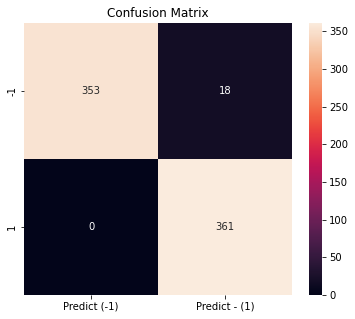

In [39]:
Recall = recall_score(y_test, SVC_test_pred,average='weighted')
Prec = precision_score(y_test, SVC_test_pred,average='weighted')

print ('Recall Score is',Recall)
print ('Precision Score is',Prec)

print ('\nClassification Report : ')
print (classification_report(y_test, SVC_test_pred))

# Confusion Matrix
cm=metrics.confusion_matrix(y_test, SVC_test_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["-1", "1"]],
                  columns = [i for i in ["Predict (-1)","Predict - (1)"]])
plt.figure(figsize = (6,5))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d");

In [40]:
#Outlier Treatment
for i in Xscaled_train.columns:
    q1, q2, q3 = Xscaled_train[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = Xscaled_train[i] > q3 + 1.5*IQR
    b = Xscaled_train[i] < q1 - 1.5*IQR
    Xscaled_train[i] = np.where(a | b, q2, Xscaled_train[i])

In [41]:
# We build the model after outlier treatment.

svc1 = SVC(random_state=42)

svc1.fit(Xscaled_train,y_train)

SVC_train_pred1 = svc1.predict(Xscaled_train)
SVC_test_pred1 = svc1.predict(Xscaled_test)

svc_train_Acc1 = accuracy_score(y_train,SVC_train_pred1)
svc_test_Acc1 = accuracy_score(y_test, SVC_test_pred1)

print ('SVC model train Accuracy Score is',svc_train_Acc1)
print ('SVC model test Accuracy Score is',svc_test_Acc1)

SVC model train Accuracy Score is 0.9936189608021878
SVC model test Accuracy Score is 0.894808743169399


Recall Score is 0.894808743169399
Precision Score is 0.903748637401034

Classification Report : 
              precision    recall  f1-score   support

          -1       0.85      0.97      0.90       371
           1       0.96      0.82      0.88       361

    accuracy                           0.89       732
   macro avg       0.90      0.89      0.89       732
weighted avg       0.90      0.89      0.89       732



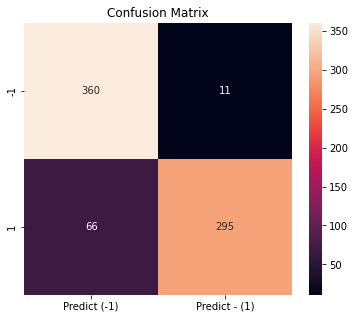

In [42]:
Recall1 = recall_score(y_test, SVC_test_pred1,average='weighted')
Prec1 = precision_score(y_test, SVC_test_pred1,average='weighted')

print ('Recall Score is',Recall1)
print ('Precision Score is',Prec1)

print ('\nClassification Report : ')
print (classification_report(y_test, SVC_test_pred1))

# Confusion Matrix
cm=metrics.confusion_matrix(y_test, SVC_test_pred1)

df_cm = pd.DataFrame(cm, index = [i for i in ["-1", "1"]],
                  columns = [i for i in ["Predict (-1)","Predict - (1)"]])
plt.figure(figsize = (6,5))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d");

#### B. Use cross validation techniques.

In [44]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 50)

scores = cross_val_score(svc,Xscaled_train,y_train, cv = k_folds)

print(" Cross Validation Scores: ", scores)
print("\n Average CV Score: ", scores.mean())
print("\n Number of CV Scores used in Average: ", len(scores))


 Cross Validation Scores:  [1.         0.95454545 0.95454545 0.97727273 0.88636364 1.
 0.95454545 0.97727273 0.95454545 1.         0.93181818 0.95454545
 0.90909091 0.97727273 1.         0.97727273 0.95454545 0.93181818
 1.         1.         1.         1.         0.90909091 0.95454545
 1.         0.97727273 0.97727273 0.95454545 0.95454545 0.95454545
 1.         0.90909091 0.93181818 0.88636364 0.97727273 1.
 0.97727273 1.         0.95454545 1.         0.97727273 0.97727273
 0.93181818 0.93181818 1.         0.97674419 0.93023256 1.
 0.97674419 0.97674419]

 Average CV Score:  0.9658456659619449

 Number of CV Scores used in Average:  50


#### C. Apply hyper-parameter tuning techniques to get the best accuracy.

In [45]:
# Import the library
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
RSCV = RandomizedSearchCV(SVC(), param_grid,random_state=42)

In [46]:
# fitting the model for grid search
RSCV.fit(Xscaled_train,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [47]:
print('Best parameters are',RSCV.best_params_)
print('Best score is',RSCV.best_score_)

Best parameters are {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
Best score is 0.9480471390977835


#### D. Use any other technique/method which can enhance the model performance.

In [48]:
from sklearn.decomposition import PCA #Import library

In [49]:
# Applying PCA with 95% components
pca = PCA(n_components=0.95, random_state=42)
pca.fit(Xscaled_train)

PCA(n_components=0.95, random_state=42)

In [50]:
pca.components_

array([[-1.46091305e-01, -1.01401154e-02,  7.31296364e-02, ...,
        -1.61429583e-42, -9.38664226e-02,  9.31245606e-02],
       [ 2.14979927e-03, -1.00157493e-01,  1.33722800e-02, ...,
         0.00000000e+00,  7.19438448e-02, -1.26856524e-02],
       [ 1.37662152e-01, -9.49447270e-02,  2.89743418e-02, ...,
        -0.00000000e+00, -1.77080858e-01,  7.36099831e-02],
       ...,
       [ 6.70530208e-02,  8.55447829e-02, -1.80346954e-01, ...,
         1.94289029e-16, -7.55876109e-02, -2.89727507e-01],
       [ 1.24280013e-01,  1.22622463e-02, -2.41721444e-01, ...,
        -1.73472348e-17, -1.85732439e-02,  2.36364653e-01],
       [-2.78155658e-02, -5.37202568e-02, -8.38279465e-02, ...,
        -4.16333634e-17, -6.13890400e-02, -2.15832747e-01]])

In [51]:
Xpca = pca.transform(Xscaled_train)
Xpca

array([[-0.64717553,  0.39333726,  1.12204587, ...,  0.27987329,
        -0.30406721,  0.28190825],
       [-1.93386094, -0.17815387, -0.29022154, ...,  0.1616171 ,
         0.25095595, -0.44430915],
       [ 1.30890899, -0.1159159 , -1.59390528, ..., -0.38773033,
        -0.19609317,  0.22649517],
       ...,
       [-0.73042882, -0.12942706, -1.35199773, ...,  0.35925619,
         0.72802502, -0.32697453],
       [-1.25887496, -0.13761014, -1.40657877, ..., -0.85727645,
        -0.04804105, -0.35179565],
       [-1.34090746,  0.42982189,  0.74277325, ..., -0.86080111,
        -0.22052765,  1.39753962]])

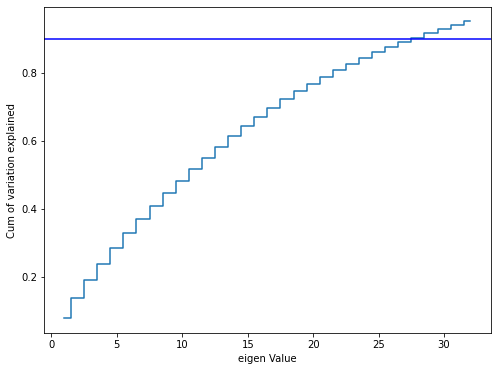

In [52]:
plt.figure(figsize=(8,6))
plt.step(list(range(1,33)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.9, color = 'b', linestyle = '-')
plt.show()

In [53]:
pca1 = PCA(n_components=28)
pca1.fit(Xscaled_train)
print(pca1.components_)
print(pca1.explained_variance_ratio_)
Xpca1 = pca1.transform(Xscaled_train)

[[-1.46091305e-01 -1.01401154e-02  7.31296364e-02 ... -0.00000000e+00
  -9.38664226e-02  9.31245606e-02]
 [ 2.14979927e-03 -1.00157493e-01  1.33722800e-02 ... -0.00000000e+00
   7.19438448e-02 -1.26856524e-02]
 [ 1.37662152e-01 -9.49447270e-02  2.89743418e-02 ...  0.00000000e+00
  -1.77080858e-01  7.36099831e-02]
 ...
 [-1.99705034e-02 -1.23263542e-01 -3.91482342e-01 ... -0.00000000e+00
  -3.90868417e-02  1.42495253e-01]
 [-2.22335236e-02 -1.10562334e-01  5.86023046e-02 ...  0.00000000e+00
   6.79111065e-02 -5.84598370e-02]
 [-6.93493496e-02 -1.40714793e-01  9.99060325e-02 ... -1.38777878e-17
  -5.96321793e-03  2.52220670e-02]]
[0.07880391 0.05777764 0.05274329 0.04778226 0.04646633 0.04445696
 0.04193311 0.03942305 0.03753342 0.03555149 0.0345881  0.03319708
 0.03285098 0.03105664 0.02923031 0.02766625 0.02601762 0.0245315
 0.02346148 0.0216913  0.02081383 0.01919899 0.01855941 0.01801169
 0.01663866 0.01520244 0.01460021 0.01350522]


In [54]:
X1 = pd.DataFrame(Xpca1)
X1.shape

(2194, 28)

In [55]:
# train & split the data
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X1,y_train, test_size = 0.20,random_state=42) 

In [56]:
svc2 = SVC(random_state=42)

svc2.fit(X2_train,Y2_train)

SVC_train_pred2 = svc2.predict(X2_train)
SVC_test_pred2 = svc2.predict(X2_test)

svc_train_Acc2 = accuracy_score(Y2_train,SVC_train_pred2)
svc_test_Acc2 = accuracy_score(Y2_test, SVC_test_pred2)

print ('SVC model train Accuracy Score is',svc_train_Acc2)
print ('SVC model test Accuracy Score is',svc_test_Acc2)

SVC model train Accuracy Score is 0.9874643874643875
SVC model test Accuracy Score is 0.9384965831435079


#### E. Display and explain the classification report in detail. 

Recall Score is 0.9384965831435079
Precision Score is 0.9427272548656876

Classification Report : 
              precision    recall  f1-score   support

          -1       0.99      0.89      0.94       227
           1       0.90      0.99      0.94       212

    accuracy                           0.94       439
   macro avg       0.94      0.94      0.94       439
weighted avg       0.94      0.94      0.94       439



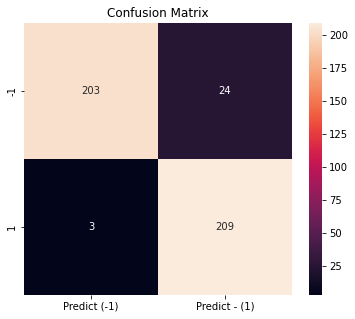

In [58]:
Recall2 = recall_score(Y2_test, SVC_test_pred2,average='weighted')
Prec2 = precision_score(Y2_test, SVC_test_pred2,average='weighted')

print ('Recall Score is',Recall2)
print ('Precision Score is',Prec2)

print ('\nClassification Report : ')
print (classification_report(Y2_test, SVC_test_pred2))

# Confusion Matrix
cm=metrics.confusion_matrix(Y2_test, SVC_test_pred2)

df_cm = pd.DataFrame(cm, index = [i for i in ["-1", "1"]],
                  columns = [i for i in ["Predict (-1)","Predict - (1)"]])
plt.figure(figsize = (6,5))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d");

* With above classification report we can see that we are getting 98% recall & precision score. And also F1- Score is 98%.

#### F. Apply the above steps for all possible models that you have learnt so far. 

In [59]:
#Import necessary libararies
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [60]:
knn = KNeighborsClassifier()

knn.fit(X2_train,Y2_train)

knn_train_pred = knn.predict(X2_train)
knn_test_pred = knn.predict(X2_test)

knn_train_Acc = accuracy_score(Y2_train,knn_train_pred)
knn_test_Acc = accuracy_score(Y2_test, knn_test_pred)

print ('KNN model train Accuracy Score is',knn_train_Acc)
print ('KNN model test Accuracy Score is',knn_test_Acc)

KNN model train Accuracy Score is 0.8757834757834758
KNN model test Accuracy Score is 0.8018223234624146


In [61]:
DT = DecisionTreeClassifier()

DT.fit(X2_train,Y2_train)

DT_train_pred = DT.predict(X2_train)
DT_test_pred = DT.predict(X2_test)

DT_train_Acc = accuracy_score(Y2_train,DT_train_pred)
DT_test_Acc = accuracy_score(Y2_test, DT_test_pred)

print ('DT model train Accuracy Score is',DT_train_Acc)
print ('DT model test Accuracy Score is',DT_test_Acc)

DT model train Accuracy Score is 1.0
DT model test Accuracy Score is 0.8200455580865603


In [62]:
RF = RandomForestClassifier()

RF.fit(X2_train,Y2_train)

RF_train_pred = RF.predict(X2_train)
RF_test_pred = RF.predict(X2_test)

RF_train_Acc = accuracy_score(Y2_train,RF_train_pred)
RF_test_Acc = accuracy_score(Y2_test, RF_test_pred)

print ('RF model train Accuracy Score is',RF_train_Acc)
print ('RF model test Accuracy Score is',RF_test_Acc)

RF model train Accuracy Score is 1.0
RF model test Accuracy Score is 0.9225512528473804


In [63]:
bacl = BaggingClassifier()

bacl.fit(X2_train,Y2_train)

bacl_train_pred = bacl.predict(X2_train)
bacl_test_pred = bacl.predict(X2_test)

bacl_train_Acc = accuracy_score(Y2_train,bacl_train_pred)
bacl_test_Acc = accuracy_score(Y2_test, bacl_test_pred)

print ('bacl model train Accuracy Score is',bacl_train_Acc)
print ('bacl model test Accuracy Score is',bacl_test_Acc)

bacl model train Accuracy Score is 0.9982905982905983
bacl model test Accuracy Score is 0.9020501138952164


In [64]:
Adb = AdaBoostClassifier()

Adb.fit(X2_train,Y2_train)

Adb_train_pred = Adb.predict(X2_train)
Adb_test_pred = Adb.predict(X2_test)

Adb_train_Acc = accuracy_score(Y2_train,Adb_train_pred)
Adb_test_Acc = accuracy_score(Y2_test, Adb_test_pred)

print ('Adb model train Accuracy Score is',Adb_train_Acc)
print ('Adb model test Accuracy Score is',Adb_test_Acc)

Adb model train Accuracy Score is 0.8455840455840455
Adb model test Accuracy Score is 0.7630979498861048


In [65]:
gbcl = GradientBoostingClassifier()

gbcl.fit(X2_train,Y2_train)

gbcl_train_pred = gbcl.predict(X2_train)
gbcl_test_pred = gbcl.predict(X2_test)

gbcl_train_Acc = accuracy_score(Y2_train,gbcl_train_pred)
gbcl_test_Acc = accuracy_score(Y2_test, gbcl_test_pred)

print ('gbcl model train Accuracy Score is',gbcl_train_Acc)
print ('gbcl model test Accuracy Score is',gbcl_test_Acc)

gbcl model train Accuracy Score is 0.9532763532763533
gbcl model test Accuracy Score is 0.8678815489749431


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm = SVC(random_state=1, gamma = 'auto')

pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 0.95)), ('model', svm)])

pipe.fit(x_train,y_train)

pipe_train_pred = pipe.predict(x_train)
pipe_test_pred = pipe.predict(x_test)

pipe_train_Acc = accuracy_score(y_train,pipe_train_pred)
pipe_test_Acc = accuracy_score(y_test, pipe_test_pred)

print ('Pipeline model train Accuracy Score is',pipe_train_Acc),
print ('Pipeline model test Accuracy Score is',pipe_test_Acc)

Pipeline model train Accuracy Score is 0.995897903372835
Pipeline model test Accuracy Score is 0.9713114754098361


### 6. Post Training and Conclusion: 

#### A. Display and compare all the models designed with their train and test accuracies.

In [67]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['SVC_Base', "SVC_Treated", "SVC_PCA","KNN_Model","Decision_Tree","Random_Forest","Bagging_Classifier","Adaboost_Classifier","GradientBoosting"], 
                          'Train_accuracy': [svc_train_Acc, svc_train_Acc1,svc_train_Acc2,knn_train_Acc, DT_train_Acc,RF_train_Acc, bacl_train_Acc, Adb_train_Acc,gbcl_train_Acc],
                          'Test_accuracy': [svc_test_Acc, svc_test_Acc1, svc_test_Acc2,knn_test_Acc, DT_test_Acc,RF_test_Acc, bacl_test_Acc,Adb_test_Acc,gbcl_test_Acc]})
resultsDf = resultsDf[['Method', 'Train_accuracy', "Test_accuracy"]]
resultsDf

,Method,Train_accuracy,Test_accuracy
0,SVC_Base,1.00,0.98
1,SVC_Treated,0.99,0.89
2,SVC_PCA,0.99,0.94
3,KNN_Model,0.88,0.80
4,Decision_Tree,1.00,0.82
5,Random_Forest,1.00,0.92
6,Bagging_Classifier,1.00,0.90
7,Adaboost_Classifier,0.85,0.76
8,GradientBoosting,0.95,0.87


#### B. Select the final best trained model along with your detailed comments for selecting this model.

With above comparision we can select the Pipline model which train & test accuracy score is better than other model.

Also we are getting 98% of F1-Score.

#### C. Pickle the selected model for future use. 

In [68]:
# loading library
import pickle

In [69]:
# create an iterator object with write permission - SVC as SVC.pkl
with open('SVC', 'wb') as files:
    pickle.dump(svc, files)

In [70]:
# load saved model
with open('SVC', 'rb') as f:
    svc = pickle.load(f)

In [71]:
svc

SVC(random_state=42)

#### D. Write your conclusion on the results.

### Conlcusion

**SVC model was the best performing model in all the models in context of accuracy score. Since data was little imbalanced which has been upsampled to negate imbalance effect. We have used PCA method for reduce the dimension of the dataset.**


**Also we have used Pipeline method to simply the process of the model building. We considered their evaluation metrices to choose best model.**


**We saved the model into pickle for future use.**